In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [ ]:
df =pd.read_csv("/content/vista minable - solicitudes de compra.csv" , header = 0 )

In [ ]:
df.nunique()

,0
Internal ID,62200
Class,7
Fecha y Hora,312633
Field,2
Old Value,10
New Value,9
Role,22
Sociedad Anónima,4
Ubicación Anónima,63
Nombre Anónimo,624


In [ ]:
df.shape

(449184, 12)

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


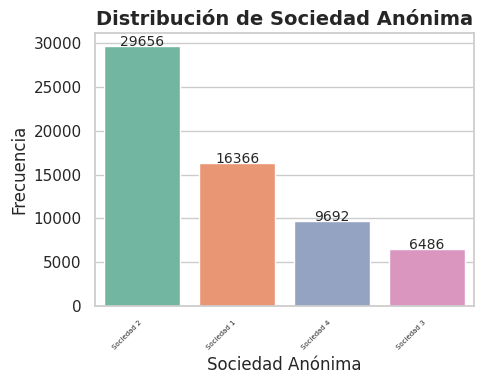

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


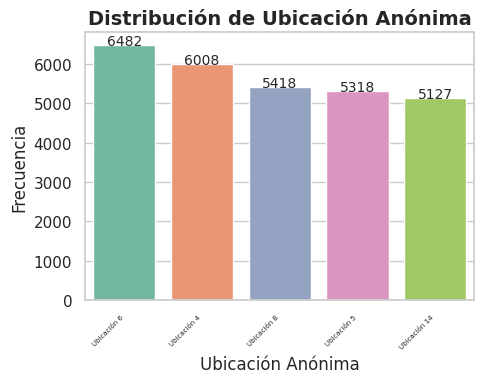

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


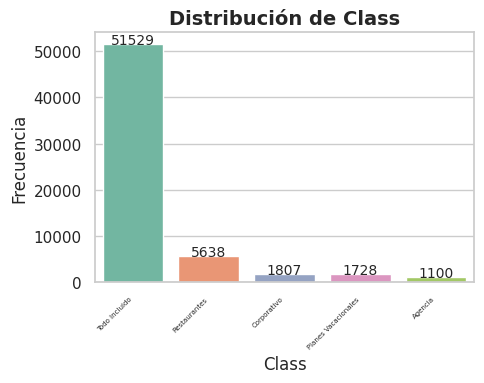

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique = df.drop_duplicates(subset= ['Internal ID'])

## NUMERO DE INTERACCIONES

# Set style for better aesthetics
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Sociedad Anónima', 'Ubicación Anónima', 'Class']

# Assuming 'df_unique' and 'columns' are already defined
# Loop through each column and generate a count plot
for i in columns:
    # Get the top 5 most common categories in each column
    order = df_unique[i].value_counts().head().index

    # Create the count plot
    plt.figure(figsize=(5, 4))  # Adjust figure size
    ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=5)

    # Set plot titles and labels
    plt.title(f'Distribución de {i}', fontsize=14, fontweight='bold')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Add count labels inside the bars using a loop for all patches
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Calculate the x-position for the label
            height + 3,  # Calculate the y-position for the label (adjust as needed)
            '{:1.0f}'.format(height),  # Format the label text (e.g., with 0 decimal places)
            ha="center",  # Horizontal alignment of the label
            fontsize=10,
        )

    # Show the plot with tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# Tipo "class" que se tiene en el proceso
class_hotel = df.groupby('Ubicación Anónima')['Class'].nunique().sort_values(ascending=False).reset_index()
class_hotel['Class'].value_counts()

,count
Class,
1,52
2,8
3,3


In [ ]:
freq_new_value = df['New Value'].value_counts().reset_index() #reset_index(): This is used to turn the result of value_counts() into a DataFrame where the Value is the index and Frequency is the column.
freq_new_value.columns = ['Nombre Proceso' , 'Frecuencia en NV']

freq_old_value = df['Old Value'].value_counts().reset_index()
freq_old_value.columns = ['Nombre Proceso' , 'Frecuencia en OV']

freq_table = pd.merge ( freq_old_value , freq_new_value , on = 'Nombre Proceso' , how = 'outer' ).fillna(0)
freq_table


,Nombre Proceso,Frecuencia en OV,Frecuencia en NV
0,Aprobación Pendiente,61591,61697.0
1,Cerrado,20486,76857.0
2,Creada,124400,0.0
3,F,10840,12139.0
4,Orden completa,54992,57506.0
5,Orden parcial,67939,68370.0
6,Orden pendiente,87749,88587.0
7,Parcialmente recibido,20533,21907.0
8,Rechazado,11,577.0
9,T,643,61544.0


In [ ]:
facturas_sociedad = df.groupby('Sociedad Anónima')['Internal ID'].nunique().sort_values(ascending=False).reset_index()
facturas_sociedad

,Sociedad Anónima,Internal ID
0,Sociedad 2,29656
1,Sociedad 1,16366
2,Sociedad 4,9692
3,Sociedad 3,6486


In [ ]:
##USUARIOS UNICOS QUE INTERVIENEN EN CADA FACTURACION
usuarios_factura = df.groupby('Internal ID')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_factura


,Internal ID,Nombre Anónimo
0,50506766,8
1,64828392,8
2,36869657,8
3,60329550,7
4,60756933,7
...,...,...
62195,36876702,1
62196,36874253,1
62197,36766035,1
62198,36826200,1


In [ ]:
usuarios_factura.describe()

,Internal ID,Nombre Anónimo
count,6.220000e+04,62200.000000
mean,4.990164e+07,3.465080
std,1.056991e+07,0.819034
min,3.328214e+07,1.000000
25%,4.018589e+07,3.000000
50%,4.933860e+07,3.000000
75%,5.925137e+07,4.000000
max,6.829092e+07,8.000000


In [ ]:
usuarios_proceso = df.groupby('New Value')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_proceso

,New Value,Nombre Anónimo
0,Cerrado,432
1,T,417
2,Orden pendiente,415
3,F,390
4,Aprobación Pendiente,389
5,Parcialmente recibido,289
6,Orden completa,220
7,Orden parcial,183
8,Rechazado,84


In [ ]:
# 1. Average Timestamp by 'Document Number'
avg_timestamp_by_doc = df.groupby('Internal ID')['TimeStamp'].mean().reset_index()

# 2. Average Timestamp by 'New Value'
avg_timestamp_by_new_value = df.groupby('New Value')['TimeStamp'].mean().reset_index()

# Display the results
print("Average Timestamp by Internal ID:")
print(avg_timestamp_by_doc)

print("\nAverage Timestamp by New Value:")
print(avg_timestamp_by_new_value)

Average Timestamp by Internal ID:
       Internal ID     TimeStamp
0         33282137  26430.394444
1         33282238  26429.733333
2         33282641   4947.627083
3         33282742   9183.719231
4         33282743   4071.621569
...            ...           ...
62195     68287715      9.566667
62196     68288284   2518.283333
62197     68288296   8350.893333
62198     68288801   4079.159524
62199     68290916    644.027778

[62200 rows x 2 columns]

Average Timestamp by New Value:
               New Value      TimeStamp
0   Aprobación Pendiente     874.737395
1                Cerrado     943.528568
2                      F    3791.377053
3         Orden completa    9950.958999
4          Orden parcial   13650.661334
5        Orden pendiente    5945.425999
6  Parcialmente recibido  101091.992295
7              Rechazado     111.814263
8                      T     553.550583


In [ ]:
avg_timestamp_by_doc

,Internal ID,TimeStamp
0,33282137,26430.394444
1,33282238,26429.733333
2,33282641,4947.627083
3,33282742,9183.719231
4,33282743,4071.621569
...,...,...
62195,68287715,9.566667
62196,68288284,2518.283333
62197,68288296,8350.893333
62198,68288801,4079.159524


In [ ]:
avg_timestamp_by_doc['TimeStamp'].mean()

np.float64(10835.046881892898)